In [7]:
from numpy import genfromtxt, array
from matplotlib import pyplot as plt

In [2]:
# y = mx + b
# m is slope, b is y-intercept


def error_function(b, m, points):
    total_error = 0

    for point in points:
        x, y = point
        total_error += (y - (m * x + b)) ** 2

    return total_error / float(len(points))


In [3]:
def gradient_descent(b_current, m_current, points, learning_rate):
    b_gradient = 0
    m_gradient = 0
    n = float(len(points))

    for point in points:
        x, y = point
        b_gradient += -(2 / n) * (y - (m_current * x + b_current))
        m_gradient += -(2 / n) * (y - (m_current * x + b_current)) * x

    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    
    return new_b, new_m

In [4]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate,
                            num_iterations):
    b = starting_b
    m = starting_m
    cost_array = list()
    
    for i in range(num_iterations):
        if i % 1_00_000 == 0:
            print(f"{i} Iterations Completed with cost = {error_function(b, m, points)}")
        
        b, m = gradient_descent(b, m, array(points), learning_rate)
        cost_array.append(error_function(b, m, points))
        
    print()
    
    return m, b

[[ 32.50234527  31.70700585]
 [ 53.42680403  68.77759598]
 [ 61.53035803  62.5623823 ]
 [ 47.47563963  71.54663223]
 [ 59.81320787  87.23092513]
 [ 55.14218841  78.21151827]
 [ 52.21179669  79.64197305]
 [ 39.29956669  59.17148932]
 [ 48.10504169  75.3312423 ]
 [ 52.55001444  71.30087989]
 [ 45.41973014  55.16567715]
 [ 54.35163488  82.47884676]
 [ 44.1640495   62.00892325]
 [ 58.16847072  75.39287043]
 [ 56.72720806  81.43619216]
 [ 48.95588857  60.72360244]
 [ 44.68719623  82.89250373]
 [ 60.29732685  97.37989686]
 [ 45.61864377  48.84715332]
 [ 38.81681754  56.87721319]
 [ 66.18981661  83.87856466]
 [ 65.41605175 118.5912173 ]
 [ 47.48120861  57.25181946]
 [ 41.57564262  51.39174408]
 [ 51.84518691  75.38065167]
 [ 59.37082201  74.76556403]
 [ 57.31000344  95.45505292]
 [ 63.61556125  95.22936602]
 [ 46.73761941  79.05240617]
 [ 50.55676015  83.43207142]
 [ 52.22399609  63.35879032]
 [ 35.56783005  41.4128853 ]
 [ 42.43647694  76.61734128]
 [ 58.16454011  96.76956643]
 [ 57.50444762

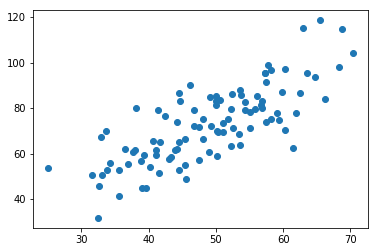

In [5]:
points = genfromtxt("data.csv", delimiter=",")

x = [i[0] for i in points]
y = [i[1] for i in points]
print(points)


plt.scatter(x, y)
plt.show()

Running Gradient Descent...
0 Iterations Completed with cost = 5565.107834483211

After 10000 iterations b = 0.6078985997054931, m = 1.4675440436333027, error = 112.31533427075733


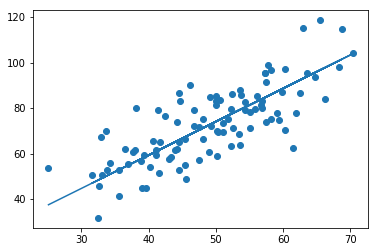

In [6]:
# Gradient Descent

learning_rate = 0.0001
initial_m = 0
initial_bias = 0
num_iterations = 1_00_00  # One Million

print("Running Gradient Descent...")

m, bias = gradient_descent_runner(points, initial_bias, initial_m,
                                  learning_rate, num_iterations)

print(
    f"After {num_iterations} iterations b = {bias}, m = {m}, error = {error_function(bias, m, points)}"
)

plt.scatter(x, y)
plt.plot(x, [m * x_i + bias for x_i in x])
plt.show()